# Работа с численными данными в `python` (и немного картиночек)

На прошлом занятии мы познакомились с основными конструкциями `python`: циклами, условиями, функциями и т.д. Однако, встроенные в `python` средства ограничены &mdash; этот язык создавался как основа для других библиотек, которые и предоставляют более широкие возможности. Сегодня мы познакомимся с *модулями* (библиотеками) и научимся работать с численными данными.


В этом занятии мы познакомимся с модулями `numpy` и `lksh`. Последний модуль мы написали специально для вас, чтобы не забивать вам голову деталями, которые не нужны для работы с конкретными практиками. В сложной версии этого же занятия (`numerical_python_hard.ipynb`) почти не используется `lksh`, в ней можно познакомиться с другими модулями, которые используются в реальной жизни. Если чувствуете в себе силы и желание, то можете попробовать её!

## Модули

Модуль &mdash; это набор функций и объектов, которые могут быть использованы в других программах. Для того чтобы работать с модулем, его нужно импортировать. Давайте попробуем импортировать модуль `numpy`:

In [1]:
import numpy

Чтобы использовать функцию из модуля, нужно обратится к ней через точку, например:

In [8]:
print(numpy.sqrt(2)) # квадратный корень из 2 (sqrt - square root)

1.4142135623730951


Часто, писать каждый раз `numpy` полностью неудобно. Поэтому многие модули импортируются следующим образом: `import numpy as np`. В этом случае мы можем обращаться к функциям модуля `numpy` через `np`. Для многих модулей есть свои конвенциональные сокращения, для `numpy` это `np`:

In [9]:
import numpy as np

В `numpy` есть огромное количество функций, так что даже поверхностное их описание займёт огромное количество времени. Однако мы рассмотрим *тип данных* `ndarray`, так как это немного упростит дальнейшую работу. Такие *массивы* (в дальнейшем именно так мы и будем их называть) можно сделать из списков с помощью функции `np.array`:

In [10]:
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
np_l = np.array(l)
print(l, np_l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0 1 2 3 4 5 6 7 8 9]


Выглядит очень похоже на список, но это на самом деле гораздо более интересная структура данных. Давайте познакомимся с некоторыми функциями, позволяющими создавать шаблонные массивы:

In [11]:
print('Массив из 10 единиц:', np.ones(10))
print('Массив из 10 нулей:', np.zeros(10)) 
print('Массив из чисел от 1 до 9:', np.arange(1, 10)) # первое число - начало, второе - конец (не включая)
print('Массив из чисел от 1 до 9 с шагом в 2:', np.arange(1, 10, 2)) # последнее число - шаг

Массив из 10 единиц: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Массив из 10 нулей: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Массив из чисел от 1 до 9: [1 2 3 4 5 6 7 8 9]
Массив из чисел от 1 до 9 с шагом в 2: [1 3 5 7 9]


Как следует из названия, `ndarray` (n-dimensional array) может быть не только одномерным. Двумерные массивы называются матрицами, их можно создавать из вложенных списков или с помощью генераторов:

In [40]:
print('Матрица 5x5 из единиц:')
print(np.ones([5, 5])) # размер матрицы задается списком вида:
                       # [размер_первого_измерения, размер_второго_измерения, ...]

l = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
np_l = np.array(l)
print('Матрица из списка:')
print(np_l)
print('Оригинальный список:')
print(l)

Матрица 5x5 из единиц:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Матрица из списка:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Оригинальный список:
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


Можно сделать и обратную операцию &mdash; узнать размер существующего массива:

In [43]:
print('Размер массива np_l', np_l.shape)

Размер массива np_l (3, 3)


Двумерные массивы индексируются немного по-другому:

In [14]:
l = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
np_l = np.array(l)
print('Изначальная матрица:')
print(np_l)
print('Левый верхний элемент матрицы:', np_l[0, 0]) # каждое измерение отвечает каждому числу в скобочках

# выберем все строки [:] в нулевом столбце [0]
print('Первый столбец:', np_l[:, 0])  

# выберем нулевую строку [0] и все столбцы [:]
print('Первая строка:', np_l[0, :])  

Изначальная матрица:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Левый верхний элемент матрицы: 1
Первый столбец: [1 4 7]
Первая строка: [1 2 3]


Одно из удобств `ndarray` заключается в том, что их можно легко умножать на число, складывать друг с другом, умножать друг на друга и т.д.:

In [13]:
l = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
np_l = np.array(l)
print('Оригинальная матрица:')
print(np_l)
print('Матрица*2:')
print(np_l*2)

numbers = np.arange(0, 10)
other_numbers = np.arange(0, 20, 2)
result = numbers*other_numbers # поэлементное умножение: каждый i-й элемент умножается на i-й элемент
print('Результат умножения:', result)

Оригинальная матрица:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Матрица*2:
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
Результат умножения: [  0   2   8  18  32  50  72  98 128 162]


<p>
<details>
<summary>☝️ <i> <u> Как бы это выгядело при работе со списками (кликните, если интересно) </u></i>  </summary>

Нам бы пришлось делать это в цикле, так как мы не можем их перемножать в одну строчку. Смотрите как это громоздко:

``` python

numbers = list(np.arange(0, 10))
other_numbers = list(np.arange(0, 20, 2))
result = []
for i in range(len(numbers)):
    result.append(numbers[i]*other_numbers[i])
```

Когда мы начинаем работать с физическими формулами, например пытаемся умножить массив длин волн на массив потока излучения, то это превращается из красивого: 

``` python  
wavelength * flux
```
в большой и не очень читаемый цикл. <s> А потом через четыре месяца, читая свой код, мы начинаем жаловаться, что ничего не понимаем </s>

</details>
</p>

Можно применять и другие математические функции и операции ко всем элементам массива:

In [29]:
x = np.linspace(0, 2*np.pi, 10) # начинаем с нуля, заканчиваем на числе пи, всего 10 элементов
print('Икс:', x)
print('Синус икс', np.sin(x))
print('Икс квадрат', x**2)

Икс: [0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
Синус икс [ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
Икс квадрат [ 0.          0.48738787  1.94955149  4.38649084  7.79820595 12.18469679
 17.54596338 23.88200571 31.19282379 39.4784176 ]


Попробуйте посчитать вашу любимую функцию (если не можете ничего вспомнить, посчитайте, например, квадратный многочлен):

In [1]:
# Ваш код: напишите y = *какая-то функция, которая зависит от x*

✨ **Дополнительное задание:** используя функцию `np.random.randn(100)` (число в скобках означает количество элементов в массиве) создайте массив из 100 случайных чисел и найдите среднее значение, минимальное и максимальное число в массиве. 

✨✨ **Дополнительное задание:** используя:
```python
mu = 0
sigma = 1
x = np.linspace(-5, 5, 100)
```
и функцию `np.exp(x)` (это означает $e^{x}$) запишите формулу:
$$\Large \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Эта функция называется [функцией Гаусса](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%BE%D0%B2%D0%B0_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F), mu &mdash; среднее значение этой функции, а sigma &mdash; стандартное отклонение. 

<p>
<details>
<summary>
✨✨✨ <b>Дополнительное задание:</b> (кликните, если интересно)   </summary>


используя [формулу оценки дисперсии случайной величины](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B9_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B): 
$$S = 1/n(X - mean(X))^2$$
где `mean` &mdash; среднее массива, `n` &mdash; количество элементов в массиве, `X` &mdash; массив случайных чисел, найдите дисперсию полученного массива.

Бонус: попробуйте поменять количество элементов в массиве и посмотрите, как меняется дисперсия.

</details>
</p>


Конечно, любые функции лучше смотреть на графиках и визуализировать их! Эх, вот бы была возможность построить все это...

## Визуализация

Как здорово, что в нашем модуле `lksh` есть подходящая функция! Для ее импорта воспользуемся конструкцией, которую мы еще не использовали &mdash; `from модуль import функция`. Изучим:

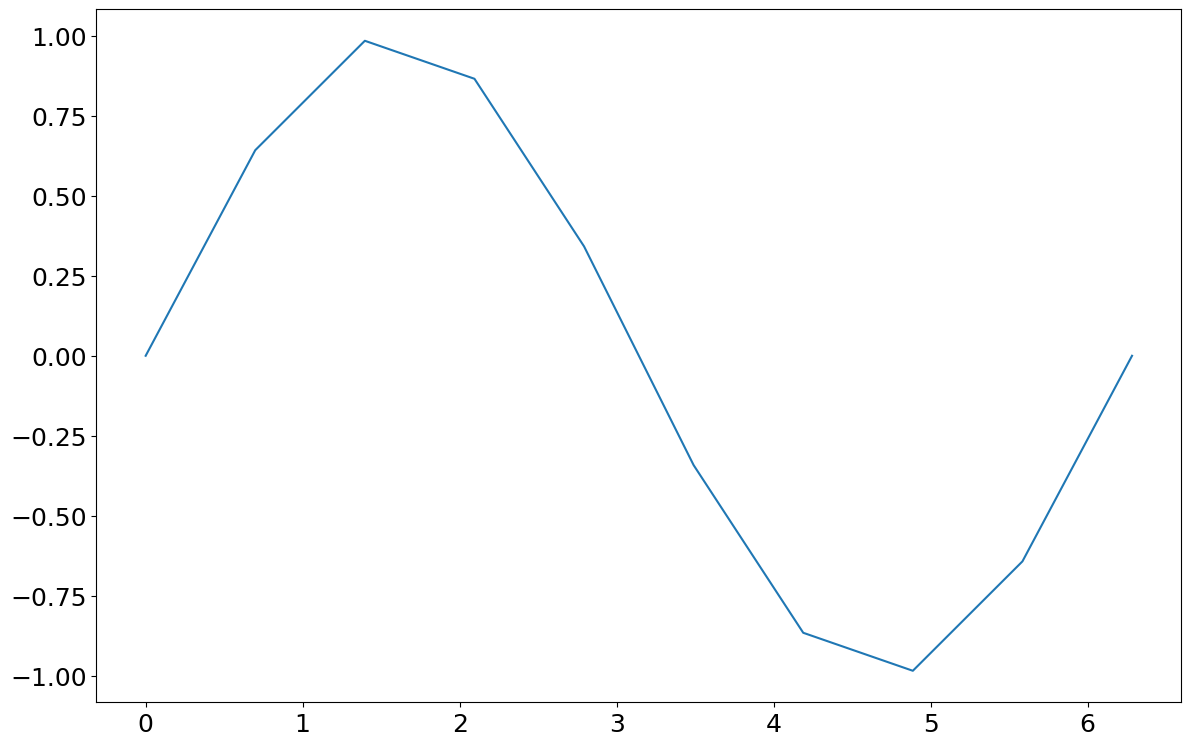

In [30]:
from lksh import plot

plot(x, np.sin(x))

Ого! Красиво, но немного уголовато. Давайте увеличим количество точек:

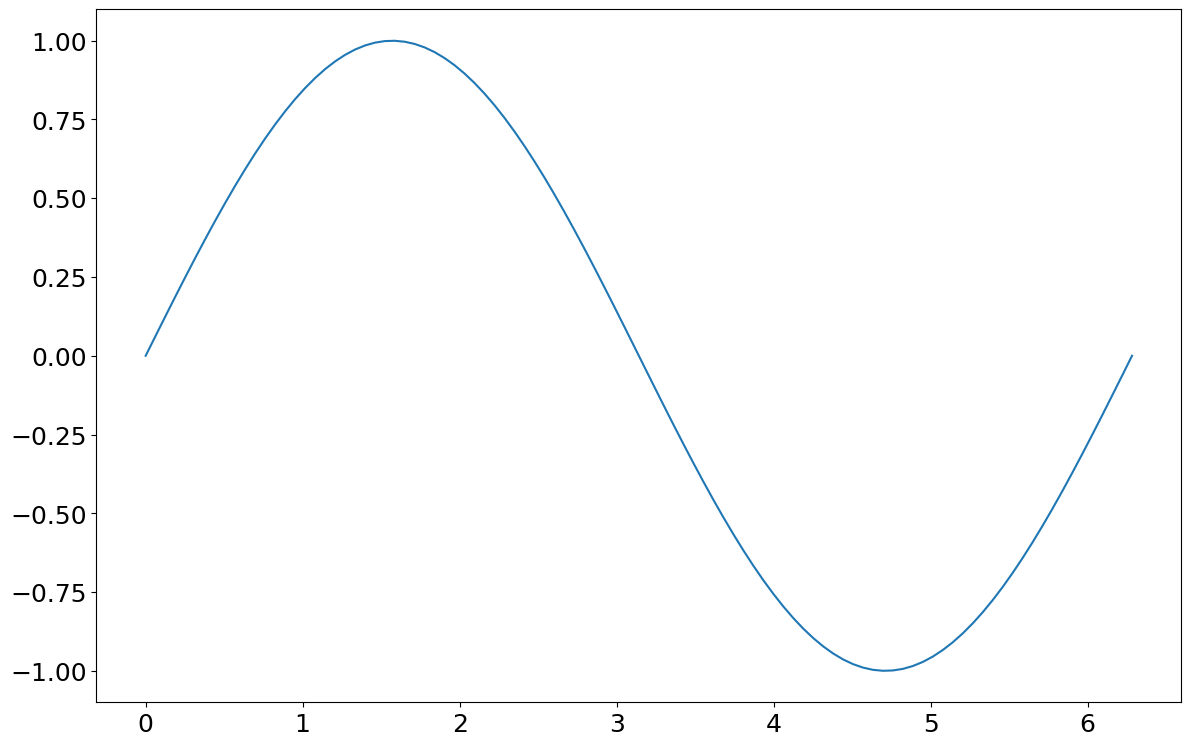

In [32]:
x = np.linspace(0, 2*np.pi, 100) # начинаем с нуля, заканчиваем на числе пи, всего 10 элементов

plot(x, np.sin(x))

На картинках всегда стоит подписывать оси:

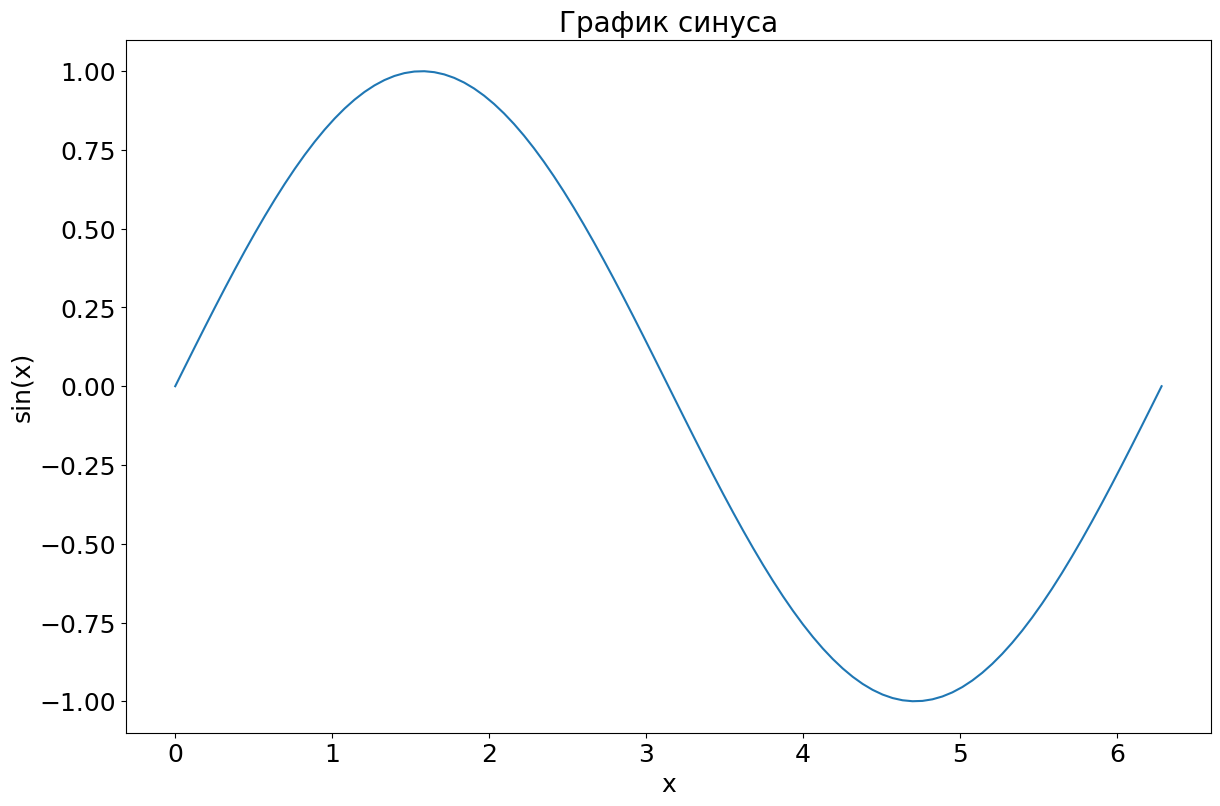

In [33]:
plot(x, np.sin(x), xlabel='x', ylabel='sin(x)', title='График синуса')

На одном графике можно построить сразу несколько картинок:

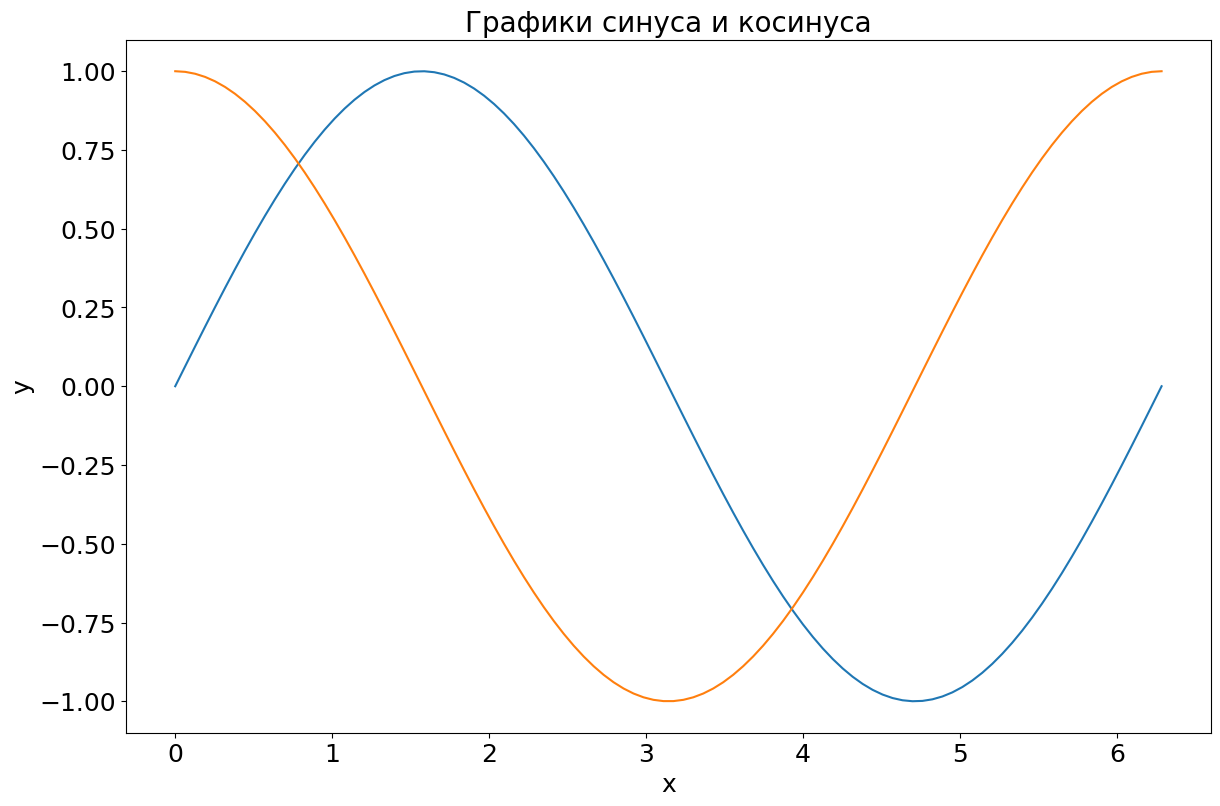

In [35]:
plot(x, np.sin(x), xlabel='x', ylabel='y', title='Графики синуса и косинуса')
plot(x, np.cos(x), xlabel='x', ylabel='y')

Чтобы мы не запутались что из них что, давайте подпишем каждый график:

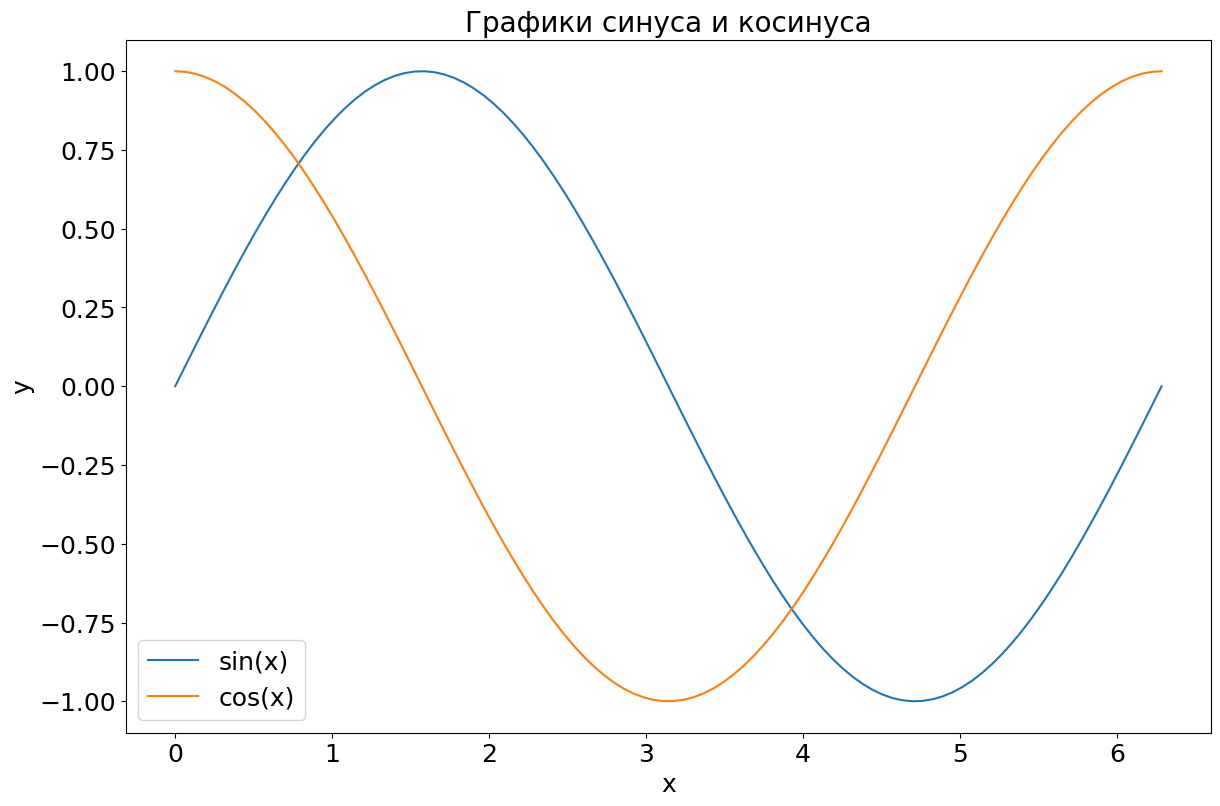

In [36]:
plot(x, np.sin(x), xlabel='x', ylabel='y', title='Графики синуса и косинуса', label='sin(x)')
plot(x, np.cos(x), xlabel='x', ylabel='y', label='cos(x)')

✨✨ **Дополнительное задание:** напишите программу, которая рисует 20 графиков синуса со сдвигом фазы в 0.1 $\pi$ (то что находится в скобках тригонометрических функций)

Если вдруг оказалось, что мы хотим приблизить какой-то участок графика и внимательно его рассмотреть, то мы можем воспользоваться функциями `xlim` и `ylim`, которые ограничивают область по оси `x` и `y` соответственно: 

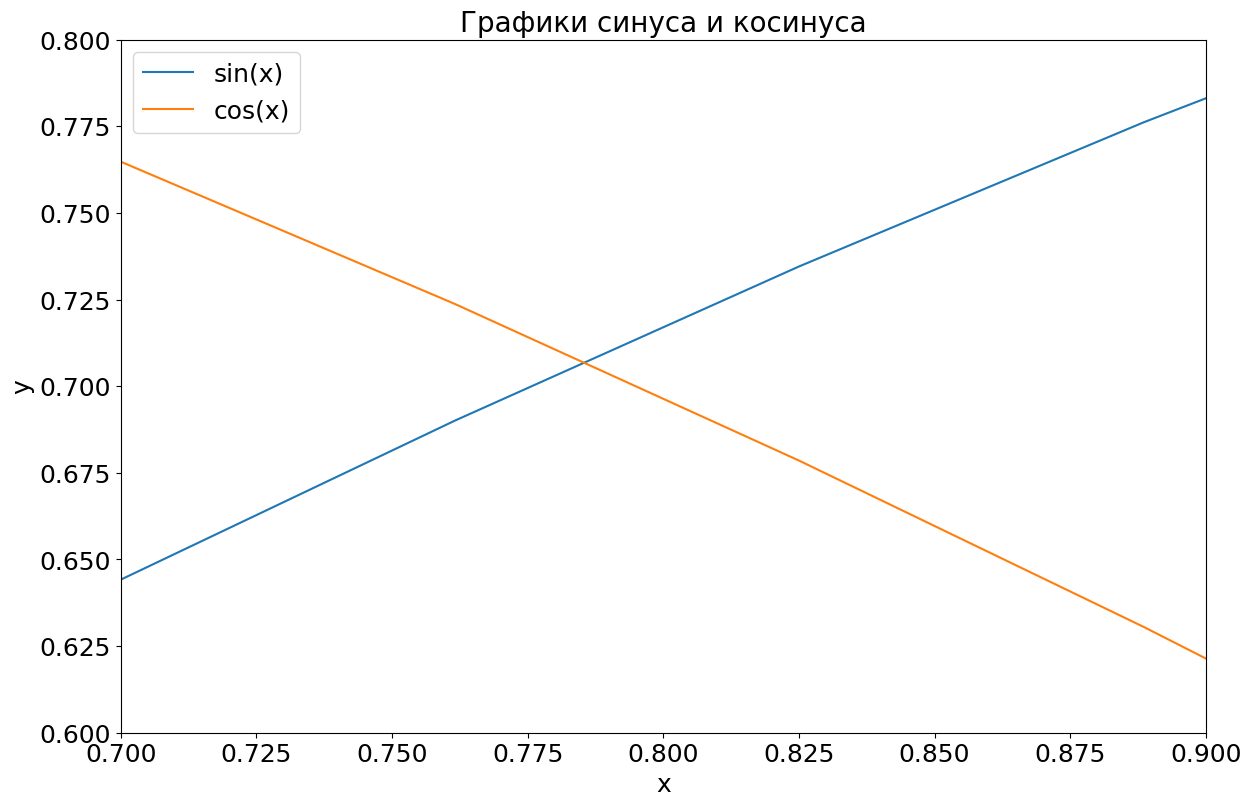

In [46]:
from lksh import xlim, ylim

plot(x, np.sin(x), xlabel='x', ylabel='y', title='Графики синуса и косинуса', label='sin(x)')
plot(x, np.cos(x), xlabel='x', ylabel='y', label='cos(x)')

xlim(0.7, 0.9)
ylim(0.6, 0.8)

✨✨ **Дополнительное задание:** если вы посчитали ранее функцию Гаусса, постройте ее на графике. Что она вам напоминает?

## Загрузка данных

Последний блок на который мы взглянем в этом уроке &mdash; это загрузка данных. Мы будем использовать функцию `load_data` из нашего модуля: 

In [49]:
from lksh import load_data

x_data, y_data = load_data('data/lab.txt') # в x_data и y_data мы загружаем значения 
                                # из первого столбца и второго столбца соответственно

Давайте посмотрим, что лежит внутри этого файла (обязательно вставьте в xlabel и ylabel названия осей, а в title - название графика):

In [ ]:
plot(x_data, y_data, xlabel=, ylabel=, title=) # вставьте сюда любые подписи и заголовок